In [7]:
import pickle



partition_path = "/home/anas.al-lahham/AD_FL/ADFL_main/CLAP/data/ucf/scence_split_V3.pkl"
with open(partition_path, "rb") as f:
    partition = pickle.load(f)

In [8]:
partition

{'buildingIndoor-offices-meuseums-factories-prisons-banks-factory storages': [2,
  3,
  6,
  21,
  35,
  73,
  74,
  78,
  82,
  84,
  86,
  130,
  154,
  189,
  194,
  211,
  217,
  219,
  228,
  240,
  241,
  246,
  255,
  256,
  257,
  266,
  277,
  292,
  297,
  298,
  299,
  304,
  311,
  317,
  324,
  329,
  336,
  340,
  809,
  810,
  815,
  816,
  820,
  824,
  825,
  826,
  833,
  835,
  843,
  845,
  847,
  850,
  854,
  856,
  859,
  864,
  869,
  872,
  875,
  879,
  880,
  882,
  885,
  886,
  891,
  896,
  897,
  898,
  900,
  902,
  904,
  907,
  912,
  913,
  917,
  918,
  924,
  928,
  932,
  934,
  935,
  936,
  938,
  941,
  947,
  948,
  950,
  953,
  955,
  957,
  961,
  962,
  965,
  969,
  970,
  971,
  972,
  973,
  974,
  977,
  979,
  980,
  982,
  983,
  984,
  989,
  995,
  1000,
  1002,
  1004,
  1005,
  1006,
  1009,
  1010,
  1016,
  1022,
  1024,
  1025,
  1031,
  1032,
  1035,
  1041,
  1044,
  1046,
  1047,
  1050,
  1051,
  1056,
  1059,
  1061,
  106

In [9]:
df_1 = pd.DataFrame(columns=['Class','max_confidance_score', 'mean_confidance_scores'])

In [14]:
# add a new row to the dataframe with 1 , 2 , 3 as values
df_1.loc[len(df_1)] = [1, 2, 4]


In [15]:
df_1

,Class,max_confidance_score,mean_confidance_scores
0,1,2,3
1,1,2,3
2,1,2,4


In [4]:
partition["data_indices"][1]

{'train': [419798,
  419799,
  419800,
  419801,
  419802,
  419803,
  419804,
  419805,
  419806,
  419807,
  419808,
  419809,
  419810,
  419811,
  419812,
  419813,
  419814,
  419815,
  419816,
  419817,
  419818,
  419819,
  419820,
  419821,
  419822,
  419823,
  419824,
  419825,
  419826,
  419827,
  73681,
  73682,
  73683,
  73684,
  73685,
  73686,
  73687,
  73688,
  73689,
  73690,
  73691,
  73692,
  73693,
  73694,
  73695,
  73696,
  73697,
  73698,
  73699,
  73700,
  73701,
  73702,
  73703,
  73704,
  73705,
  73706,
  73707,
  73708,
  73709,
  73710,
  73711,
  73712,
  73713,
  73714,
  73715,
  73716,
  73717,
  73718,
  73719,
  73720,
  73721,
  73722,
  73723,
  73724,
  73725,
  73726,
  73727,
  73728,
  73729,
  73730,
  73731,
  73732,
  73733,
  73734,
  73735,
  73736,
  73737,
  73738,
  73739,
  73740,
  73741,
  73742,
  73743,
  73744,
  73745,
  73746,
  73747,
  73748,
  73749,
  73750,
  73751,
  73752,
  73753,
  73754,
  73755,
  73756,
  73757

In [9]:
from typing import Dict, List, Tuple, Union
data_indices: List[List[int]] = partition["data_indices"]

In [ ]:
partition["data_indices"]

In [9]:
for indices in data_indices:
    print(indices)
    break


{'train': array([ 3234, 25409, 35856, ..., 50719, 18429, 55660]), 'test': array([34251, 40243, 47363, ..., 41539, 53871, 35724])}


In [1]:
import pickle
from argparse import Namespace
from collections import OrderedDict
from copy import deepcopy
from typing import Dict, List, Tuple, Union
from pathlib import Path

import torch
from torch.utils.data import DataLoader, Subset
from torchvision import transforms


from src.config.utils import trainable_params, get_best_device, evaluate, Logger
from src.config.models import DecoupledModel
from data.utils.constants import MEAN, STD
from data.utils.datasets import DATASETS
import torch.utils.data as data
import numpy as np


In [2]:
class Dataset_Con_all_feedback_XD(data.Dataset):
    def __init__(self, transform=None, test_mode=False):



        if test_mode:

            self.con_all = np.load("/home/anas.al-lahham/AnomalyDetection/RTFM/10_crop_features/Concat_test_10.npy")
            print('self.con_all shape:',self.con_all.shape)
        else:
            
            
            # self.con_all = np.load('iterative_UCF_labels/'+'{}.npy'.format(args.conall))
            self.con_all = np.load("/home/anas.al-lahham/Baseline_AD/RFS_AD/Best_Pseudo_labels/Pseudo_Lebels_Maximum_AUC:0.8464948944321682.npy")
            print('self.con_all shape:',self.con_all.shape)
            # self.label_ab = np.load('iterative_UCF_labels/'+'{}.npy'.format(args.pseudofile))
            # self.label_all = np.concatenate((self.label_ab, np.zeros((779951-len(self.label_ab),))), axis=0)
            # print('self.label_all shape:',self.label_all.shape)

        self.tranform = transform
        self.test_mode = test_mode
        

    def __getitem__(self, index):
        
        
        if self.test_mode:
            features = self.con_all[index]
            features = np.array(features, dtype=np.float32)
            return features
        else:
            
            features = self.con_all[index]
            features = np.array(features, dtype=np.float32)

            return features
    def __len__(self):
        return len(self.con_all)

In [3]:
dataset = Dataset_Con_all_feedback_XD(transform=None, test_mode=False)

self.con_all shape: (199252,)


In [4]:
trainloader: DataLoader = None
# testloader: DataLoader = None
trainset: Subset = Subset(dataset, indices=[])
# testset: Subset = Subset(dataset, indices=[])

In [10]:
trainset.indices= data_indices[0]['train']

In [11]:
trainset.indices

array([ 3234, 25409, 35856, ..., 50719, 18429, 55660])

#### Our Data division

In [12]:
import numpy as np 
import os 
import torch


In [10]:
a = torch.arange(9, dtype= torch.float) - 4
b = a.reshape((3, 3))

In [14]:
b.norm(2), torch.norm(b,p=2)

(tensor(7.7460), tensor(7.7460))

In [13]:
np.load("original_pl.npy").shape

(779780,)

IndexError: list assignment index out of range

In [10]:
xd_test =  np.load("C:/Users/User/PycharmProjects/FL_AD/gt.npy")
ucf_test = np.load("C:/Users/User/PycharmProjects/FL_AD/gt-ucf-RTFM.npy")

In [11]:
xd_test.shape, np.count_nonzero(xd_test), np.count_nonzero(xd_test) / xd_test.shape[0] 

((2330384,), 537805, 0.2307795625098696)

In [12]:
ucf_test.shape, np.count_nonzero(ucf_test), np.count_nonzero(ucf_test) / ucf_test.shape[0] 

((1114144,), 84389, 0.07574335094924893)

In [2]:
train_list = list(open('C:/Users/User/PycharmProjects/FL_AD/UCF_Train_ten_crop_i3d_complete_V1.txt'))
test_list = list(open('C:/Users/User/PycharmProjects/FL_AD/UCF_Test_ten_crop_i3d_complete_V1.txt'))
train_list

['/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse002_x264_i3d.npy,0,55\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse003_x264_i3d.npy,55,287\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse004_x264_i3d.npy,287,1337\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse005_x264_i3d.npy,1337,1397\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse006_x264_i3d.npy,1397,1671\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse007_x264_i3d.npy,1671,1743\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse008_x264_i3d.npy,1743,2269\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse009_x264_i3d.npy,2269,2332\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse010_x264_i3d.npy,2332,2403\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse

In [8]:
for i in train_list:
    np.load(i.split('\n')[0].split(',')[0]) 
    break

FileNotFoundError: [Errno 2] No such file or directory: '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse002_x264_i3d.npy'

In [7]:
clients_num = 100

In [8]:
clients_4_train = list(range(clients_num))
clients_4_test = list(range(clients_num))

In [9]:
partition = {"separation": None, "data_indices": None, "video_num" : None}

In [10]:
partition["separation"] = {
    "train": clients_4_train,
    "test": clients_4_test,
    "total": clients_num,
}

In [11]:
partition["separation"]

{'train': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'test': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,


In [12]:
videos_num = 1610
videos_idx = list(range(videos_num))


In [13]:
partition["data_indices"] = None
partition["video_num"] = None

In [14]:
data_indices = [[] for _ in range(clients_num)]

In [15]:
partition["data_indices"] = data_indices
partition["video_num"] = data_indices

In [17]:
partition["data_indices"]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [18]:
import random

# Create an array of 1610 numbers (replace this with your actual array)
all_numbers_train = list(range(1609))

# Define the number of agents and calculate the chunk size
num_agents = 100
chunk_size = len(all_numbers_train) // num_agents

# Shuffle the array randomly to ensure IID distribution
random.shuffle(all_numbers_train)

# Divide the shuffled array into chunks for each agent
agents_data_train = [all_numbers_train[i * chunk_size:(i + 1) * chunk_size] for i in range(num_agents)]

# If there's any remaining data, distribute it evenly among the agents
remaining_data = all_numbers_train[num_agents * chunk_size:]
for i, num in enumerate(remaining_data):
    agents_data_train[i % num_agents].append(num)

In [19]:
agents_data_train[0]

[1110,
 925,
 846,
 416,
 104,
 766,
 1179,
 30,
 407,
 120,
 1460,
 1214,
 586,
 1209,
 550,
 343,
 433]

In [20]:
import random

# Create an array of 1610 numbers (replace this with your actual array)
all_numbers_test = list(range(290))

# Define the number of agents and calculate the chunk size
num_agents = 100
chunk_size = len(all_numbers_test) // num_agents

# Shuffle the array randomly to ensure IID distribution
random.shuffle(all_numbers_test)

# Divide the shuffled array into chunks for each agent
agents_data_test = [all_numbers_test[i * chunk_size:(i + 1) * chunk_size] for i in range(num_agents)]

# If there's any remaining data, distribute it evenly among the agents
remaining_data = all_numbers_test[num_agents * chunk_size:]
for i, num in enumerate(remaining_data):
    agents_data_test[i % num_agents].append(num)

In [21]:
agents_data_test[0]

[275, 108, 0]

In [16]:
for i in range(clients_num):
    partition["data_indices"][i] = {"train": agents_data_train[i], "test": agents_data_test[i]}
    partition["video_num"][i] = {"train": agents_data_train[i], "test": agents_data_test[i]}
    # break

In [17]:
partition_features = partition


In [18]:
partition_features["data_indices"][i]['train']

[1056,
 569,
 425,
 696,
 611,
 1084,
 1562,
 333,
 1466,
 651,
 532,
 1283,
 1455,
 1490,
 768,
 1248]

In [27]:
from itertools import chain
for i in range(clients_num):

    for k,v in enumerate(partition_features["data_indices"][i]['train']):
        from_id = train_list[v].split('\n')[0].split(',')[1]
        to_id = train_list[v].split('\n')[0].split(',')[2]
        partition_features["data_indices"][i]['train'][k] = list(range(int(from_id), int(to_id))) 
        
    # break
    partition_features["data_indices"][i]['train']= list(chain(*partition_features["data_indices"][i]['train']))

IndexError: list index out of range

In [178]:
from itertools import chain
for i in range(clients_num):

    for k,v in enumerate(partition_features["data_indices"][i]['test']):
        from_id = test_list[v].split('\n')[0].split(',')[1]
        to_id = test_list[v].split('\n')[0].split(',')[2]
        partition_features["data_indices"][i]['test'][k] = list(range(int(from_id), int(to_id))) 
        
    # break
    partition_features["data_indices"][i]['test']= list(chain(*partition_features["data_indices"][i]['test']))

In [181]:
with open("data/ucf/partition.pkl", "wb") as f:
    pickle.dump(partition_features, f)

In [7]:
import numpy as np

In [8]:
train_list = list(open('UCF_Train_ten_crop_i3d_complete_V1.txt'))
train_list

['/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse001_x264_i3d.npy,0,171\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse002_x264_i3d.npy,171,226\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse003_x264_i3d.npy,226,458\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse004_x264_i3d.npy,458,1508\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse005_x264_i3d.npy,1508,1568\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse006_x264_i3d.npy,1568,1842\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse007_x264_i3d.npy,1842,1914\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse008_x264_i3d.npy,1914,2440\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse009_x264_i3d.npy,2440,2503\n',
 '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse

In [9]:
for i in train_list:
    video = np.load(i.split('\n')[0].split(',')[0])
    break

FileNotFoundError: [Errno 2] No such file or directory: '/home/anas.al-lahham/AnomalyDetection/RTFM/UCF_Train_ten_crop_i3d/Abuse001_x264_i3d.npy'

#### CLustering Plots


In [1]:
import numpy as np

n_samples = 500
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
component_1 = np.dot(np.random.randn(n_samples, 2), C)  # general
component_2 = 0.7 * np.random.randn(n_samples, 2) + np.array([-4, 1])  # spherical

X = np.concatenate([component_1, component_2])

In [2]:
component_1.shape

NameError: name 'component_1' is not defined

In [37]:
import numpy as np
from sklearn.decomposition import PCA

In [40]:
scores = {}

In [32]:
idx = 1551

In [33]:
scores[idx] = 1

In [24]:
scores

{1551: 1}

In [25]:
scores.keys()

dict_keys([1551])

In [18]:
coff = lambda x:  0.5*x if x > 0.002 else 1

In [19]:
coff(0.003)

0.0015

In [1]:
import numpy as np

# Define a lambda function
my_lambda_function = lambda x: x**2  # Replace this with your desired lambda function

# Create a NumPy array
my_array = np.array([1, 2, 3, 4, 5])

# Use vectorize to apply the lambda function to each element
result_array = np.vectorize(my_lambda_function)(my_array)

print(result_array)

[ 1  4  9 16 25]


In [54]:
idx = np.array([6,88,151])

In [39]:
idx

array([1, 2, 3])

In [1]:
import numpy as np

import matplotlib.pyplot as plt 



# Example NumPy array
np_array = np.array([1, 0.05, 3])

# # Convert the NumPy array to a tuple
# key_tuple = tuple(np_array)

# # Create a dictionary with the tuple as the key
# my_dict = {key_tuple: "value"}

# # Access the value using the key
# print(my_dict[key_tuple])

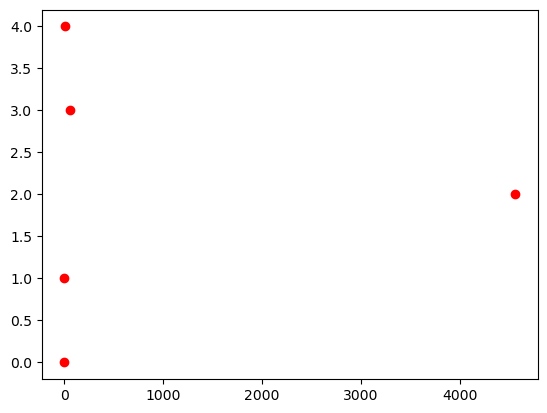

In [6]:
a = [1,2, 4564 , 61,5  ]
plt.scatter(a, range(len(a)), c='r')

In [24]:
import numpy as np

In [8]:
mu_GMM, var_GMM = 400, 100
# probability model
from scipy.stats import multivariate_normal
p_1 = multivariate_normal(mu_GMM, var_GMM)

In [9]:
mu_GMM, var_GMM = 600, 250
# probability model
from scipy.stats import multivariate_normal
p_2 = multivariate_normal(mu_GMM, var_GMM)

In [18]:
def pp():
    return multivariate_normal([400, 600], [[100, 0], [0, 250]]) 

In [37]:
a , b = 0 , 0

In [20]:
x = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [25]:
pp().pdf(np.array(x).reshape(-1, 1))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [12]:
def sum_multivariate_normals(mvn1, mvn2):
    return lambda x: 0.7*mvn1.pdf(x) + 0.3*mvn2.pdf(x)

In [13]:
result = sum_multivariate_normals(p_1, p_2)(x)

In [30]:
d = {}

In [32]:
d['1']['length'] = 1


KeyError: '1'

In [20]:
train_list = list(open('C:/Users/User/PycharmProjects/FL_AD/UCF_Train_ten_crop_i3d_complete_V1.txt'))

In [1]:
start_index = 810
end_index = 1608
num_agents = 13

# Calculate the total number of indices
total_indices = end_index - start_index + 1

# Calculate the number of indices each agent will handle
indices_per_agent = total_indices // num_agents

# Initialize a list to store the ranges for each agent
agent_ranges = []

# Distribute the indices among the agents
for i in range(num_agents):
    agent_start = start_index + i * indices_per_agent
    agent_end = start_index + (i + 1) * indices_per_agent - 1
    agent_ranges.append((agent_start, agent_end))

# Adjust the last agent's range to include any remaining indices
agent_ranges[-1] = (agent_ranges[-1][0], end_index)

In [2]:
agent_ranges

[(810, 870),
 (871, 931),
 (932, 992),
 (993, 1053),
 (1054, 1114),
 (1115, 1175),
 (1176, 1236),
 (1237, 1297),
 (1298, 1358),
 (1359, 1419),
 (1420, 1480),
 (1481, 1541),
 (1542, 1608)]